# Semana 2: Reproducción del baseline

## 2. Extracción de características (HRV, estadísticas)

In [2]:
# obtener datos de ecg_rr_features_extracted.csv
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Configuración de la ruta del directorio
current_dir = os.getcwd()
# Ruta al archivo CSV
csv_file = os.path.join(current_dir, '..\data\ecg_rr_features_complete.csv')
# Cargar el archivo CSV
df = pd.read_csv(csv_file)
# Ver datos del DataFrame
print("Datos del DataFrame:")
print(df.head())
# cantidad de filas y columnas
print("\nCantidad de filas y columnas:")    
print(df.shape)

Datos del DataFrame:
      mean_rr      std_rr   skew_rr    kurt_rr label
0  761.666667   33.093435  0.133439   1.811500     N
1  867.575758  251.388431 -1.267438   2.884663     N
2  731.434599   79.934367 -2.918037  14.419521     N
3  947.111111  178.938709  0.482376   2.062416     A
4  542.324159  223.975072  1.170247   2.981416     A

Cantidad de filas y columnas:
(8527, 5)


## Quitar datos innecesarios

In [3]:
# Ver los tipos de labels 
print("\nTipos de labels:")
print(df['label'].unique())


Tipos de labels:
['N' 'A' 'O' '~']


In [4]:
# mantener sólo labels de tipo 'N' y 'A'
df = df[df['label'].isin(['N', 'A'])]
print("\nDatos del DataFrame filtrados:")
print(df.head())
print("\n labels únicos después del filtrado:")
print(df['label'].unique())

# Cantidad de Ns
n = df[df['label'] == 'N'].shape[0]
# Cantidad de As
a = df[df['label'] == 'A'].shape[0]
print("\nCantidad de N:", n)
print("Cantidad de A:", a)


Datos del DataFrame filtrados:
      mean_rr      std_rr   skew_rr    kurt_rr label
0  761.666667   33.093435  0.133439   1.811500     N
1  867.575758  251.388431 -1.267438   2.884663     N
2  731.434599   79.934367 -2.918037  14.419521     N
3  947.111111  178.938709  0.482376   2.062416     A
4  542.324159  223.975072  1.170247   2.981416     A

 labels únicos después del filtrado:
['N' 'A']

Cantidad de N: 5050
Cantidad de A: 738


## 3. Entrenamiento del modelo baseline (Random Forest)


Características más importantes:
   feature  importance
0  mean_rr    0.329001
1   std_rr    0.280979
2  skew_rr    0.213681
3  kurt_rr    0.176340


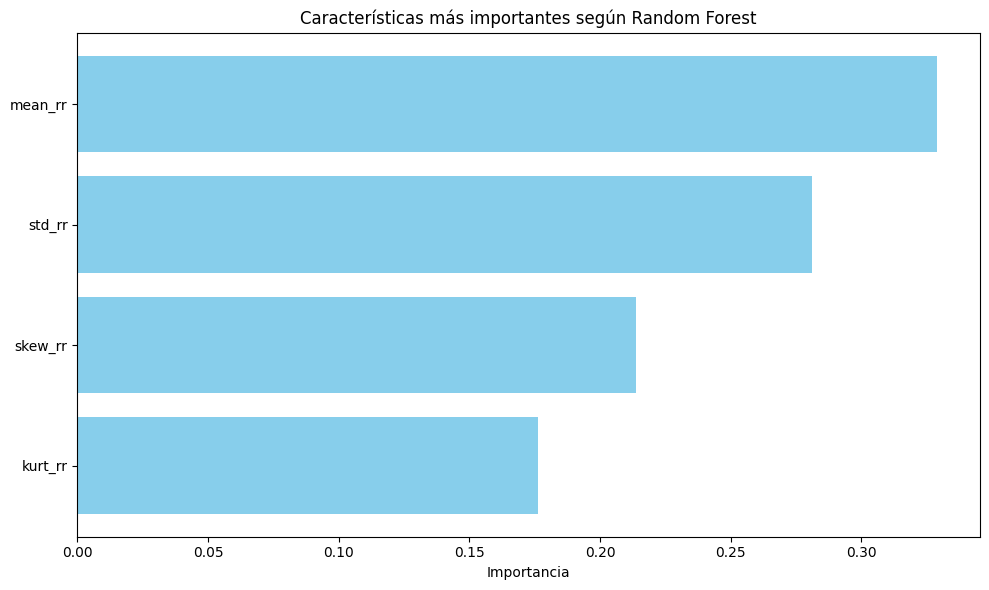

In [5]:
# aplicar random forest para obtener las características más importantes
from sklearn.ensemble import RandomForestClassifier
# Separar características y etiquetas
X = df.drop(columns=['label'])
y = df['label']
# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el modelo
rf.fit(X, y)
# Obtener la importancia de las características
importances = rf.feature_importances_
# Crear un DataFrame para las importancias
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
# Ordenar las importancias de mayor a menor
importance_df = importance_df.sort_values(by='importance', ascending=False)
# Mostrar las características más importantes
print("\nCaracterísticas más importantes:")
print(importance_df.head(10))

# Graficar las importancias
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.title('Características más importantes según Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la más importante en la parte superior
plt.tight_layout()
plt.show()


## 4. Evaluación simple

In [6]:
# dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("\nDimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)
# Entrenar el modelo de Random Forest con los datos de entrenamiento
rf.fit(X_train, y_train)



Dimensiones del conjunto de entrenamiento: (4630, 4) (4630,)
Dimensiones del conjunto de prueba: (1158, 4) (1158,)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Realizar predicciones
y_pred = rf.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='A')
precision = precision_score(y_test, y_pred, pos_label='A')
recall = recall_score(y_test, y_pred, pos_label='A')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.96
F1-Score: 0.86
Precision: 0.85
Recall: 0.86


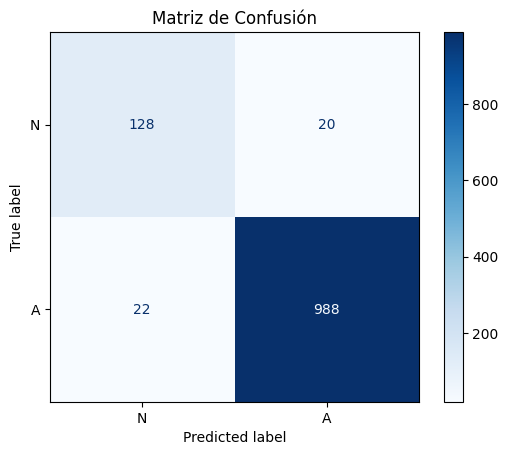

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizar la matriz de confusión
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=['N', 'A'], cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

In [9]:
# guardar df 
output_file = os.path.join(current_dir, '..\data\ecg_rr_features_complete_with_rf.csv')
df.to_csv(output_file, index=False)

In [14]:
# Guardar el modelo entrenado
import joblib
# Guardar el modelo en un archivo
model_file = os.path.join(current_dir, '..', 'models', 'random_forest_model.pkl')
joblib.dump(rf, model_file)


['f:\\repoPart6\\proyectoML\\notebooks\\..\\models\\random_forest_model.pkl']

# Conclusiones Semana 2
El modelo Random Forest, entrenado con características estadísticas de los intervalos RR,  logró una accuracy del 96%, lo cual es un muy buen resultado considerando la simplicidad del modelo.
El modelo obtuvo una precision de 86%, lo que significa que se produjeron algunos falsos positivos.
Recall fue de 86%, indicando que el modelo no detectó todos los casos reales de AFib (osea, hubo falsos negativos) y en contexto médico es mejor detectar todos los posibles casos "enfermedad".
La distribución desbalanceada de clases puede estar afectando el modelo de igual forma. Una posible mejora es aplicar técnicas de balanceo como sobremuestreo (SMOTE) o submuestreo.

Además las características más relevantes según el modelo fueron mean_rr y std_rr, lo cual concuerda con la teoría, la fibrilación auricular suele tener mayor variabilidad entre latidos.

Se puede concluir que el modelo baseline da una vista positiva del desarrollo del modelo, ya que usando estadísticas simples de intervalos RR, y un modelo preliminar se puede clasificar en primera instancia. Los cual sienta una base sólida para explorar mejoras.